In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV파일 
import plotly.express as px #그래프
import plotly.graph_objects as go #그래프
from plotly.subplots import make_subplots #그래프
import plotly.figure_factory as ff #그래프
import matplotlib.pyplot as plt #그래프
import seaborn as sns #그래프
import missingno as msno #결측데이터를 파악하는데 도움을 준다.
import os #os 운영체제에서 자연스럽게 하던 작업들을 코드에서도 활용하게 해준다.

colors = ["#FFFFFF", "6CD4FF", "#F7DF00", "#E60000"]

from plotly.offline import plot, iplot, init_notebook_mode #쥬피터 노트북모드
import plotly.graph_objs as go
init_notebook_mode(connected=True)

plt.rcParams["figure.figsize"] = (12,8) #rcParams 차트 figure의 기본설정 지정 figsize 기본 크기 설정

for dirname, _, filenames in os.walk('kaggle/nyra_2019'): #하위의 폴더들을 for문으로 탐색할 수 있다
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle/nyra_2019\input\nyra_2019_complete.csv
kaggle/nyra_2019\input\nyra_race_table.csv
kaggle/nyra_2019\input\nyra_start_table.csv
kaggle/nyra_2019\input\nyra_tracking_table.csv


In [2]:
nyra_tracking = pd.read_csv("kaggle/nyra_2019/input/nyra_tracking_table.csv") #csv 파일을 불러오기
nyra_start = pd.read_csv("kaggle/nyra_2019/input/nyra_start_table.csv")
nyra_race = pd.read_csv("kaggle/nyra_2019/input/nyra_race_table.csv")
nyra_2019 = pd.read_csv("kaggle/nyra_2019/input/nyra_2019_complete.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_8236\4092620503.py:4: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
nyra_2019.head() #상위 다섯행을 출력

,track_id,race_date,race_number,program_numer,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [4]:
nyra_2019.describe().style.background_gradient(cmap = "Purples")  #판다스 style 

,race_number,program_number,trakus_index,latitude,longitude,track_condition,race_type,purse,post_time,jockey,odds
count,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000
mean,5.505409,183.865213,41.203867,-73.777024,756.315127,67.919189,88878.907779,420.424807,120.713291,1482.919877,4.481435
std,2.860656,118.332690,0.977123,0.047111,179.688689,38.922712,127824.025516,280.254500,4.351881,1952.415229,2.568150
min,1.000000,1.000000,40.666711,-73.832601,450.000000,0.000000,16000.000000,100.000000,110.000000,0.000000,1.000000
25%,3.000000,88.000000,40.673456,-73.828834,600.000000,45.000000,41000.000000,233.000000,118.000000,335.000000,2.000000
50%,6.000000,176.000000,40.713934,-73.769148,800.000000,54.000000,62000.000000,349.000000,120.000000,730.000000,4.000000
75%,8.000000,264.000000,40.717393,-73.725636,850.000000,80.000000,80000.000000,516.000000,122.000000,1740.000000,6.000000
max,13.000000,1062.000000,43.073992,-73.714826,2000.000000,280.000000,1500000.000000,1259.000000,160.000000,19100.000000,14.000000


In [5]:
nyra_tracking.track_id.value_counts() #기본적으로 지정된 열의 각 값 (value)에 대한 모든 발생횟수를 반환

AQU    2158369
BEL    1947134
SAR    1122927
Name: track_id, dtype: int64

In [6]:
nyra_tracking.race_number.value_counts()

8     582413
6     575217
5     559884
7     554623
4     523846
2     515115
1     508808
9     492915
3     490256
10    283141
11     98804
12     31725
13     11683
Name: race_number, dtype: int64

In [7]:
nyra_tracking.program_number.value_counts()

4      611396
3      611025
5      606666
2      602597
1      599979
6      579893
7      486905
8      373202
9      266526
10     186835
11     117532
12      71363
1A      56753
13      26507
14      15081
15       7917
2B       4081
16       3591
3X        334
1X        247
Name: program_number, dtype: int64

In [8]:
nyra_tracking['race_date'] = pd.to_datetime(nyra_tracking['race_date']) # 날짜 포맷 지정
nyra_tracking['day'], nyra_tracking['month'] = nyra_tracking['race_date'].dt.day, nyra_tracking['race_date'].dt.month 

In [9]:
########### Track_id = AQU #####################

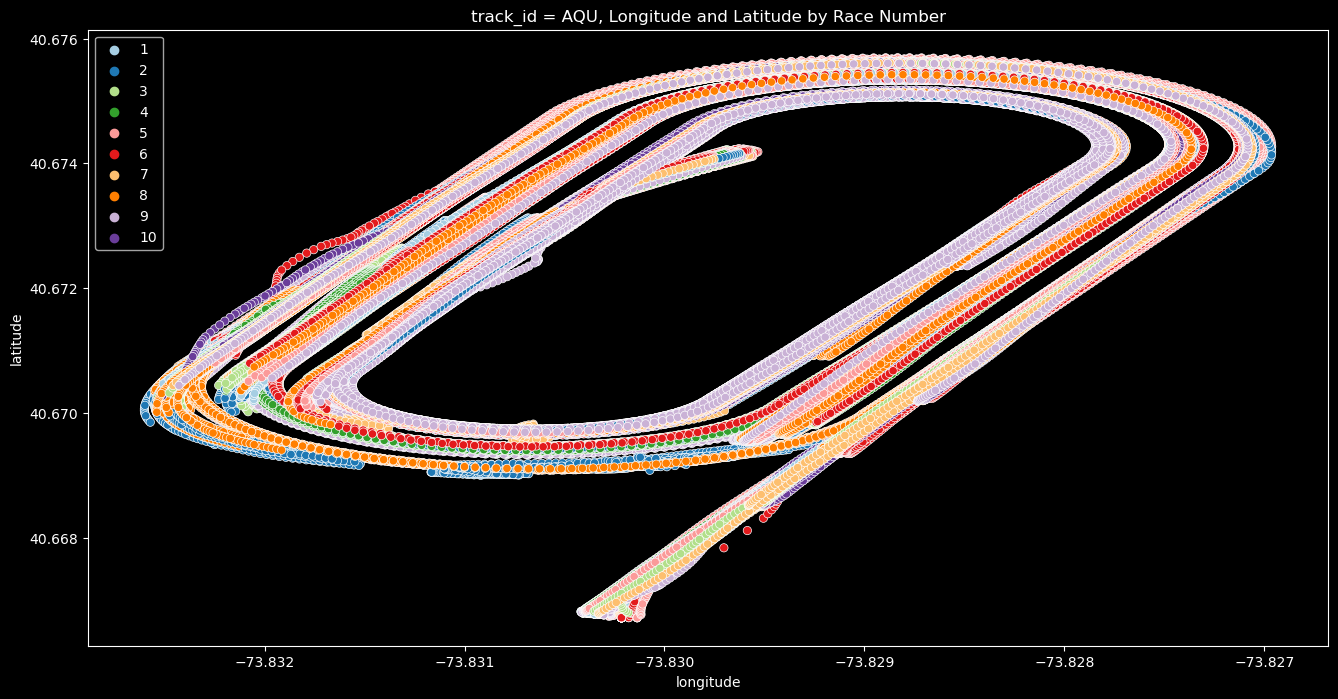

In [10]:
nyra_tracking0 = nyra_tracking[nyra_tracking["track_id"] == "AQU"]
nyra_tracking1 = nyra_tracking0[nyra_tracking0["month"] == 11]

plt.style.use("dark_background")    #matplotlib 스타일 어두운 배경
plt.figure(figsize = (16, 8))       #matplotlib 기본 크기
sns.scatterplot(data = nyra_tracking1, x = "longitude", y = "latitude", hue = "race_number", palette = "Paired") #seaborn 산점도 hue 색에 따른 변수 추가 palette 색 변경

plt.title("track_id = AQU, Longitude and Latitude by Race Number")
plt.legend()  #그래프에 범례 추가

In [11]:
############### track_id = BEL #################

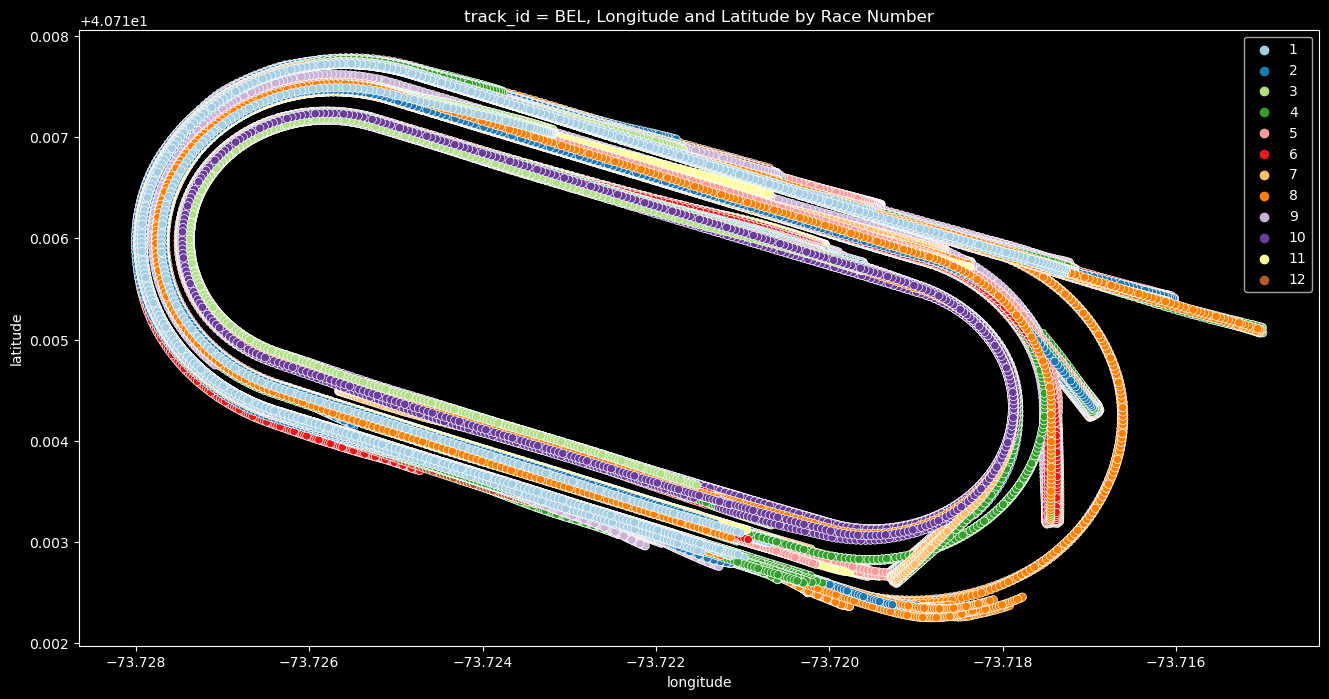

In [12]:
nyra_tracking0 = nyra_tracking[nyra_tracking["track_id"] == "BEL"]
nyra_tracking1 = nyra_tracking0[nyra_tracking0["month"] == 5 ] #tuple 트랙id BEL 5월 데이터 

plt.style.use("dark_background")
plt.figure(figsize = ( 16, 8))
sns.scatterplot(data = nyra_tracking1, x = "longitude", y = "latitude", hue = "race_number", palette = "Paired")

plt.title("track_id = BEL, Longitude and Latitude by Race Number")
plt.legend()

In [13]:
################# track_id = SAR #######################

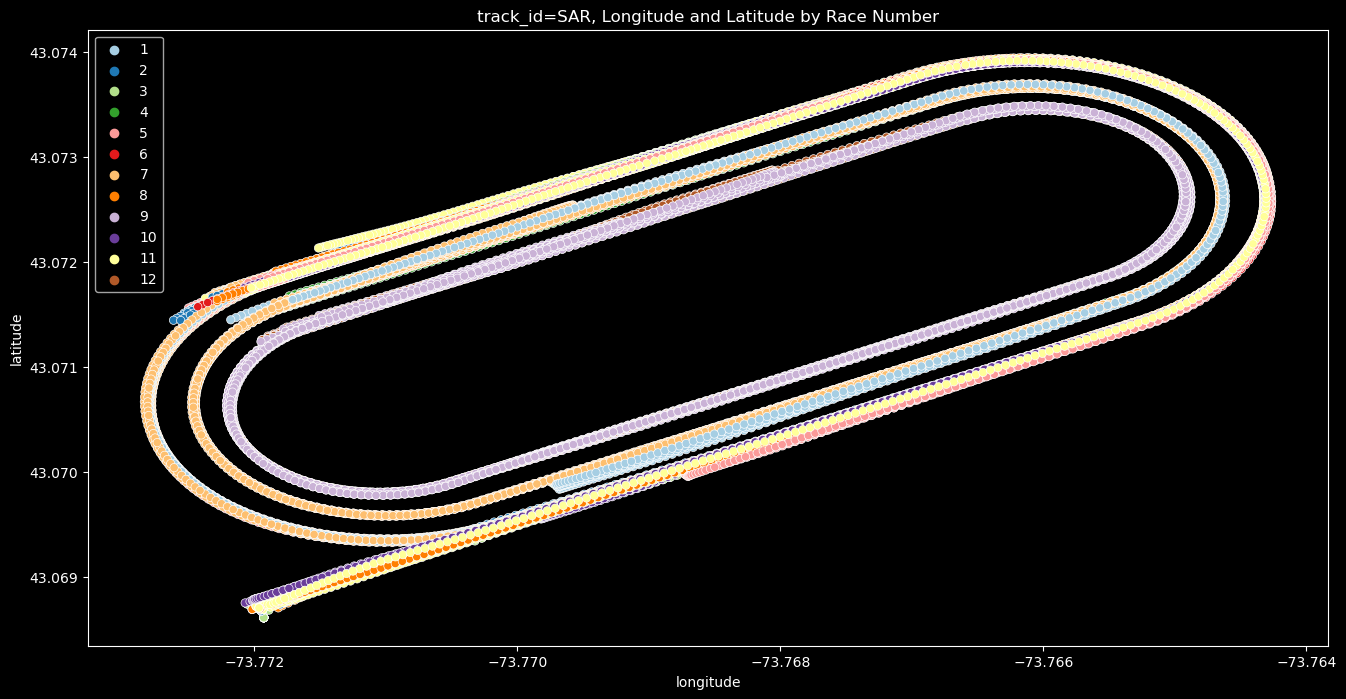

In [14]:
nyra_tracking0 = nyra_tracking[nyra_tracking["track_id"] == "SAR"]
nyra_tracking1 = nyra_tracking0[nyra_tracking0["month"] ==  9 ]

plt.style.use("dark_background")
plt.figure(figsize = (16,8))
sns.scatterplot(data = nyra_tracking1, x = "longitude", y= "latitude" , hue = "race_number", palette = "Paired")

plt.title("track_id=SAR, Longitude and Latitude by Race Number")
plt.legend()

<AxesSubplot:>

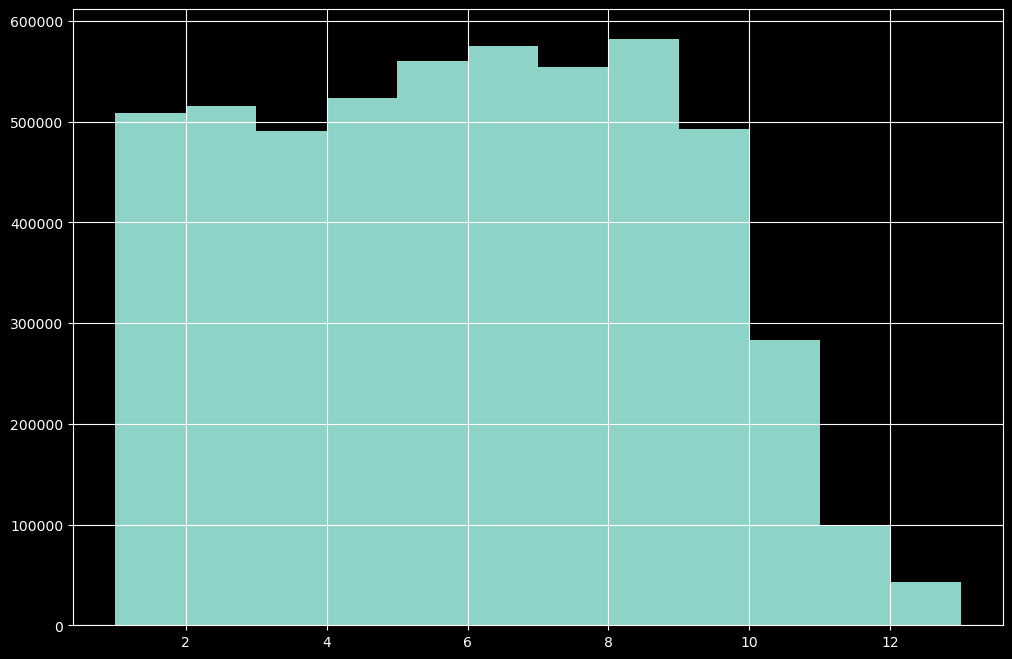

In [15]:
nyra_2019.race_number.hist(bins = 12) #히스토그램 만들기 bins: 축갯수

In [16]:
########## Trakus index race animation ####################

In [49]:
jockey = nyra_2019[nyra_2019["jockey"] == "Samuel Camacho Jr."]
jockey6 = jockey[jockey["race_number"] == 6 ]
jockeyBEL = jockey6[jockey6["track_id"] == "BEL"]
jockeyALW = jockeyBEL[jockeyBEL["race_type"] == "ALW"]
jockeyCLM = jockeyBEL[jockeyBEL["race_type"] == "CLM"]
jockeyALW = jockeyALW.sort_values(by = "trakus_index", ascending = True) #오름차순으로 정렬 ascending = False: 내림차순

fig = px.scatter(jockeyALW, x = "longitude", y = "latitude", hover_data = ["race_type", "track_id"], #데이터 추가
                animation_frame = "longitude",
                range_y = (40.7122, 40.718),
                range_x = (-73.719, -73.73),
                size = "trakus_index",
                color = "trakus_index", color_continuous_scale = "Turbo", range_color = (0, 299),
                title = "Samuel Camacho Jr. - Trakus Index, Race Number = 6, track_id = BEL")

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.update_traces(marker = dict(symbol = "circle-open", size = 20)) 
fig.update_layout(template = "plotly_dark", font = dict(family = "PT sans", size = 12))
fig.show()

IndexError: tuple index out of range

In [48]:
jockey = nyra_2019[nyra_2019["jockey"] == "Flavien Prat"]
jockey6 = jockey[jockey["race_number"] == 6]
jockeyBEL = jockey6[jockey6["track_id"] == "BEL"]
jockeyALW = jockeyBEL[jockeyBEL["race_type"] == "ALW"]
jockeyCLM = jockeyBEL[jockeyBEL["race_type"] == "CLM"]
jockeyALW = jockeyALW.sort_values(by = "trakus_index", ascending = True)

fig = px.scatter(jockeyALW, x = 'longitude', y = 'latitude', hover_data = ["race_type","track_id"],
                animation_frame = "longitude",
                range_y = (40.7122, 40.718),
                range_x = (-73.719,-73.73),
                color = "trakus_index", color_continuous_scale="Turbo", range_color = (0,299),
                title = "Flavien Prat - Trakus Index, Race Number = 6, track_id = BEL")

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.update_traces(marker = dict(symbol = "circle-open", size = 20))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

IndexError: tuple index out of range